<H1>SEARCH ENGINE FILM DENGAN NLP</H1>


Pertama import terlebih dahulu library yang diperlukan untuk proses cleaning data.

In [ ]:
import numpy as np
import pandas as pd
import spacy
import string
import gensim
import operator
import re

Kemudian, import drive agar data bisa diambil dari google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengambil data movies.csv dan menyimpannya pada variabel dengan nama df_film

In [ ]:
df_film = pd.read_csv('./drive/My Drive/NLP2023/movies.csv')

Melihat data pada df_film

In [ ]:
df_film.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


Membuat fungsi untuk proses cleaning data

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
spacy_nlp = spacy.load('en_core_web_sm')

punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens

Proses cleaning data pada variabel atau atribut wiki_plot, kemudian hasilnya disimpan pada wiki_plot_tokenized.

In [ ]:
print('Cleaning and Tokenizing....')
%time df_film['wiki_plot_tokenized'] = df_film['wiki_plot'].map(lambda x: spacy_tokenizer(x))

Cleaning and Tokenizing....
CPU times: user 19.1 s, sys: 76.1 ms, total: 19.2 s
Wall time: 19.3 s


Melihat data pada df_film untuk melihat hasil cleaning data pada atribut wiki_plot

In [ ]:
df_film.head()

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wedding, vito, corleone, hear,..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


Pada df_film tersebut dapat dilihat bahwa data pada atribut wiki_plot telah dibersihkan dan disimpan pada variabel baru yang bernama wiki_plot_tokenized, atribut inilah yang akan digunakan sebagai data pada search engine dengan isi plot film sebagai kuncinya

Selanjutnya dilakukan juga proses cleaning (pembersihan data) pada atribut genre.

In [ ]:
WORDS = ['u\'','\'']
for words in WORDS:
  df_film.genre = df_film.genre.replace(to_replace=words, value='', regex=True)

df_film['genre']=[entry.lower() for entry in df_film['genre']]

melihat kembali df_film untuk melihat atribut genre yang telah di cleaning sebelumnya.

In [ ]:
df_film.head()

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[ crime, drama]","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wedding, vito, corleone, hear,..."
1,1,The Shawshank Redemption,"[ crime, drama]","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[ biography, drama, history]","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[ biography, drama, sport]","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[ drama, romance, war]",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


Sebelumnya sudah dilakukan proses cleaning, pada bagian ini dilakukan pula proses tokenizing pada data. Selain itu, pada proses cleaning ini pula terjadi perubahan tipe data menjadi series.

In [ ]:
print('Cleaning and Tokenizing....')
%time df_film['genre_tokenized'] = df_film['genre'].map(lambda x: spacy_tokenizer(x))

Cleaning and Tokenizing....
CPU times: user 500 ms, sys: 1.25 ms, total: 501 ms
Wall time: 516 ms


Membuat sebuah variabel dengan nama movie_plot yang berisi atribut wiki_plot_tokenized pada df_film. Setelah itu, dilihat isi variabel movie_plot tersebut dari index 0 sampai sampai 4

In [ ]:
movie_plot = df_film['wiki_plot_tokenized']
movie_plot[0:5]

0    [day, daughter, wedding, vito, corleone, hear,...
1    [banker, andy, dufresne, convict, murder, wife...
2    [germans, polish, jews, kraków, ghetto, world,...
3    [brief, scene, age, overweight, italian, ameri...
4    [early, december, american, expatriate, rick, ...
Name: wiki_plot_tokenized, dtype: object

Kemudian membuat kembali sebuah variabel dengan nama movie_genre_plot yang berisi atribut genre pada df_film. Setelah itu, dilihat isi variabel movie_genre_plot tersebut dari index 0 sampai sampai 4

In [ ]:
movie_genre_plot = df_film['genre_tokenized']
movie_genre_plot[0:5]


0                 [crime, drama]
1                 [crime, drama]
2    [biography, drama, history]
3      [biography, drama, sport]
4          [drama, romance, war]
Name: genre_tokenized, dtype: object

Import library dengan nama wordcloud, library ini berfungsi untuk memetakan daftar kata. Pada bagian ini akan memetakan kata-kata yang sering muncul pada atribut movie_plot.



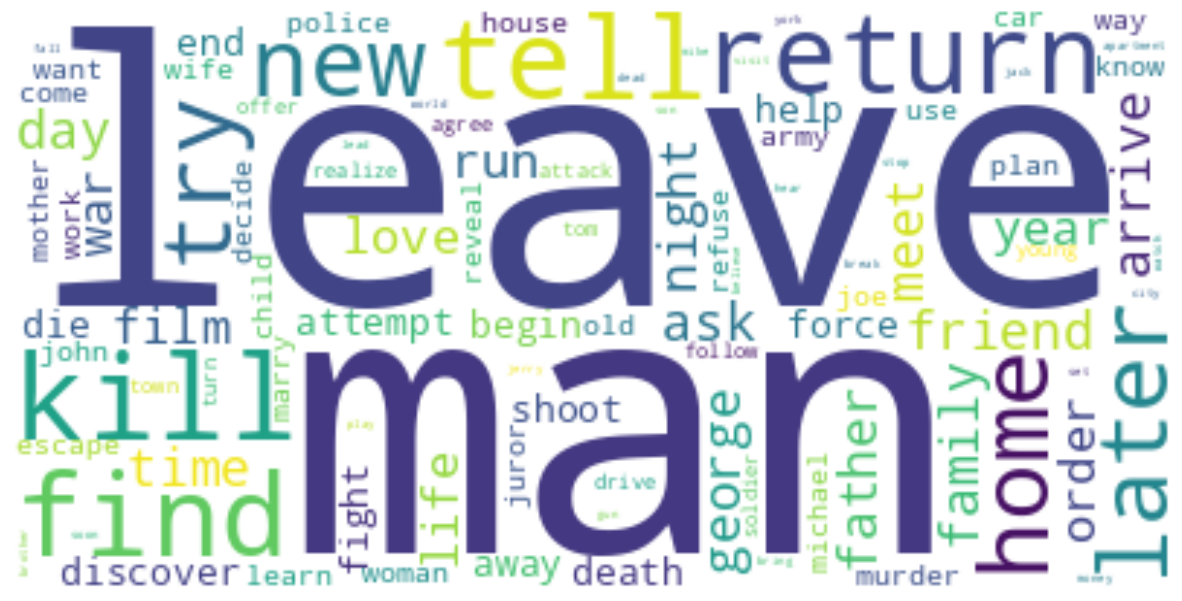

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(movie_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Kemudian dilakukan pemetakaan kembali pada variabel movie_genre_plot.

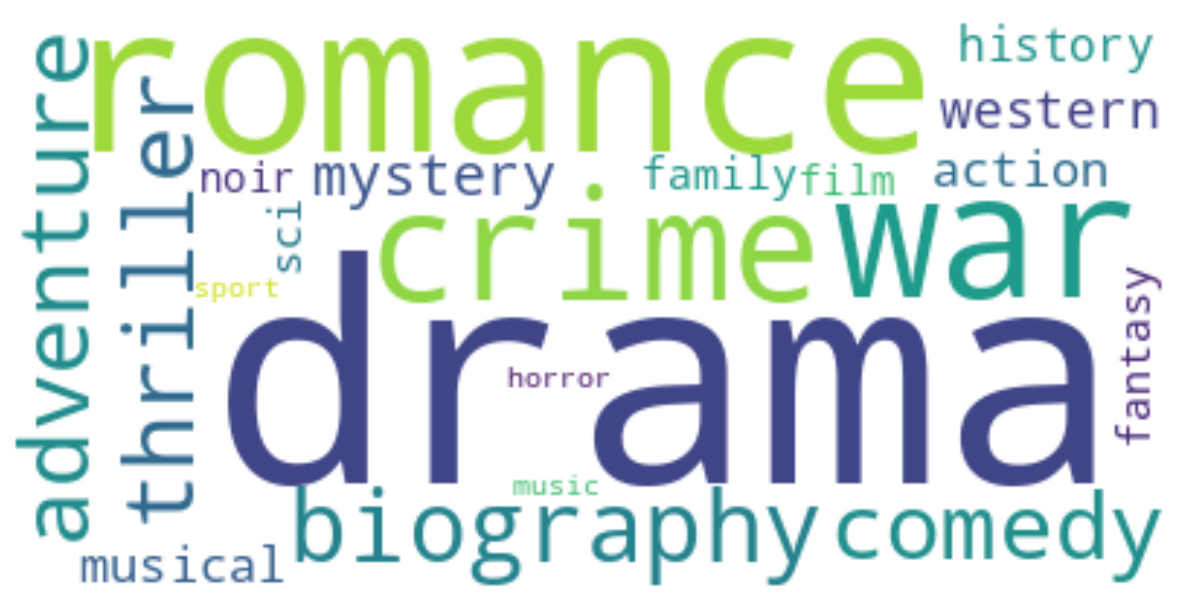

In [ ]:
series_genre = pd.Series(np.concatenate(movie_genre_plot)).value_counts()[:100]
wordcloud_genre = WordCloud(background_color='white').generate_from_frequencies(series_genre)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud_genre, interpolation='bilinear')
plt.axis('off')
plt.show()

Membuat dictionary (kamus kata) untuk movie_plot

In [ ]:
from gensim import corpora

%time dictionary = corpora.Dictionary(movie_plot)
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

CPU times: user 51.5 ms, sys: 2.89 ms, total: 54.4 ms
Wall time: 56.7 ms


Membuat dictionary (kamus kata) untuk movie_genre_plot

In [ ]:
%time dictionary_genre = corpora.Dictionary(movie_genre_plot)
stoplist_genre = set('hello and if this can would should could tell ask stop come go')
stop_ids_genre = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary_genre.token2id]
dictionary_genre.filter_tokens(stop_ids_genre)

CPU times: user 483 µs, sys: 37 µs, total: 520 µs
Wall time: 524 µs


Melihat isi serta frekuensi pada movie_plot yang disimpan pada variabel dict_tokens.

In [ ]:
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['abrasive', 0], ['abroad', 1], ['abuse', 2], ['accept', 3], ['accuse', 4], ['act', 5], ['adams', 6], ['add', 7], ['address', 8], ['agree', 9], ['ambush', 10], ['angeles', 11], ['answer', 12], ['anthony', 13], ['apollonia', 14], ['arrange', 15], ['ask', 16], ['assassin', 17], ['assassination', 18], ['associate', 19], ['attack', 20], ['attempt', 21], ['authority', 22], ['aware', 23], ['baron', 24], ['barzini', 25], ['battle', 26], ['bed', 27], ['betrayal', 28], ['bodyguard', 29], ['bomb', 30], ['booth', 31], ['brasi', 32], ['brasis', 33], ['break', 34], ['bronx', 35], ['brother', 36], ['business', 37], ['buy', 38], ['capo', 39], ['capos', 40], ['captain', 41], ['car', 42], ['career', 43], ['carlo', 44], ['casino', 45], ['christening', 46], ['christmas', 47], ['clampdown', 48], ['clemenza', 49], ['collapse', 50]]]


Melihat isi serta frekuensi pada movie_genre_plot yang disimpan pada variabel dict_tokens_genre.

In [ ]:
dict_tokens_genre = [[[dictionary_genre[key], dictionary_genre.token2id[dictionary_genre[key]]] for key, value in dictionary_genre.items() if key <= 50]]
print (dict_tokens_genre)

[[['crime', 0], ['drama', 1], ['biography', 2], ['history', 3], ['sport', 4], ['romance', 5], ['war', 6], ['mystery', 7], ['adventure', 8], ['family', 9], ['fantasy', 10], ['musical', 11], ['horror', 12], ['thriller', 13], ['film', 14], ['noir', 15], ['action', 16], ['sci', 17], ['comedy', 18], ['music', 19], ['western', 20]]]


In [ ]:
corpus = [dictionary.doc2bow(desc) for desc in movie_plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)


[[('abrasive', 2), ('abroad', 2), ('abuse', 4), ('accept', 6), ('accuse', 2), ('act', 2), ('adams', 3), ('add', 2), ('address', 2), ('agree', 2), ('ambush', 2), ('angeles', 2), ('answer', 2), ('anthony', 3), ('apollonia', 2), ('arrange', 2), ('ask', 2), ('assassin', 4), ('assassination', 4), ('associate', 2), ('attack', 4), ('attempt', 4), ('authority', 2), ('aware', 2), ('baron', 2), ('barzini', 7), ('battle', 2), ('bed', 2), ('betrayal', 2), ('bodyguard', 2), ('bomb', 2), ('booth', 2), ('brasi', 3), ('brasis', 2), ('break', 2), ('bronx', 2), ('brother', 6), ('business', 6), ('buy', 2), ('capo', 1), ('capos', 2), ('captain', 2), ('car', 2), ('career', 2), ('carlo', 7), ('casino', 2), ('christening', 4), ('christmas', 2), ('clampdown', 2), ('clemenza', 3), ('collapse', 2), ('come', 4), ('command', 2), ('confess', 2), ('confront', 2), ('connection', 2), ('connie', 4), ('connies', 2), ('consigliere', 5), ('contact', 2), ('corleone', 10), ('corleones', 4), ('corps', 3), ('coveted', 2), ('

In [ ]:
corpus_genre = [dictionary_genre.doc2bow(desc) for desc in movie_genre_plot]

word_genre_frequencies = [[(dictionary_genre[id], frequency) for id, frequency in line] for line in corpus_genre[0:3]]

print(word_genre_frequencies)

[[('crime', 1), ('drama', 1)], [('crime', 1), ('drama', 1)], [('drama', 1), ('biography', 1), ('history', 1)]]
